In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
city_df.head()
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head()
# Combine the data into a single dataset
city_ride_merge = pd.merge(ride_df,city_df, on = "city")
#city_ride_merge = city_ride_merge.loc[:,["city","date","fare","ride_id","driver_count","type"]].groupby("type", as_index=False)

# Display the data table for preview
city_ride_merge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

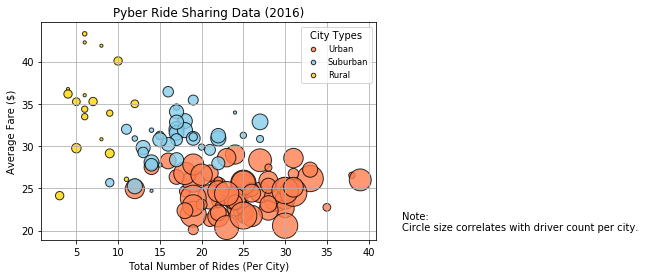

In [11]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = city_ride_merge[city_ride_merge["type"] == "Urban"]
suburban_cities = city_ride_merge[city_ride_merge["type"] == "Suburban"]
rural_cities = city_ride_merge[city_ride_merge["type"] == "Rural"]

urban_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_fares = urban_cities.groupby(["city"]).mean()["fare"]
urban_drivers = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_fares = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_drivers = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_fares = rural_cities.groupby(["city"]).mean()["fare"]
rural_drivers = rural_cities.groupby(["city"]).mean()["driver_count"]

# Build the scatter plots for each city types

plt.scatter(urban_count, 
            urban_fares, 
            s=10*urban_drivers, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Urban")

plt.scatter(suburban_count, 
            suburban_fares, 
            s=10*suburban_drivers, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Suburban")

plt.scatter(rural_count, 
            rural_fares, 
            s=10*rural_drivers, c="gold", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Rural")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [20]
lgnd.legendHandles[1]._sizes = [20]
lgnd.legendHandles[2]._sizes = [20]
# Incorporate a text label regarding circle size
plt.text(44, 20, "Note:\nCircle size correlates with driver count per city.")
# Save Figure
plt.savefig("pyber_ride_scatter.png")
plt.show()

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

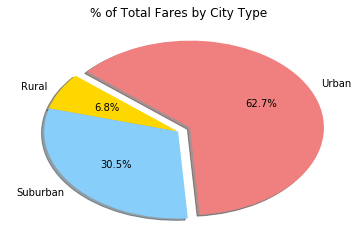

In [20]:
# Calculate Type Percents
fares_percents = 100 * city_ride_merge.groupby(["type"]).sum()["fare"] / city_ride_merge["fare"].sum()
# Build Pie Chart
plt.pie(fares_percents,
labels=["Rural", "Suburban", "Urban"], 
colors=["gold", "lightskyblue", "lightcoral"], 
explode=[0, 0, 0.1], 
autopct='%1.1f%%', 
shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("pyber_fares_pie.png")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

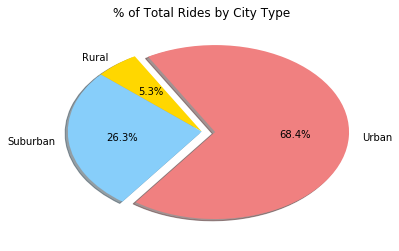

In [22]:
# Calculate Ride Percents
rides_percents = 100 * city_ride_merge.groupby(["type"]).count()["ride_id"] / city_ride_merge["ride_id"].count()
# Build Pie Chart
plt.pie(rides_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=120)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("pyber_total_rides_pie.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

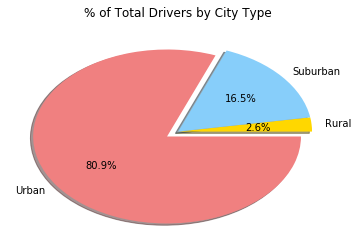

In [26]:
# Calculate Driver Percents
drivers_percents=100*city_df.groupby(["type"]).sum()["driver_count"]/city_df["driver_count"].sum()
# Build Pie Charts
plt.pie(drivers_percents, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "lightskyblue", "lightcoral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("pyber_total_drivers_pie.png")

In [ ]:
# Show Figure
plt.show()